In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [3]:
train_data = pd.read_csv('Dataset/train.csv', index_col='pet_id')
test_data = pd.read_csv('Dataset/test.csv', index_col='pet_id')

In [4]:
train_data.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
pet_id,,,,,,,,,,
ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [ ]:
test_data.head()

In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

train_data['color_type_encoded'] = encoder.fit_transform(train_data.color_type)
test_data['color_type_encoded'] = encoder.transform(test_data.color_type)

In [ ]:
train_data.isnull().sum()

In [ ]:
test_data.isnull().sum()

In [ ]:
train_data.condition.value_counts()

In [4]:
np.random.seed(42)

In [5]:
train_condition=np.random.choice(np.arange(0, 3), p=[6281/17357,6819/17357,4257/17357], size=1477)

In [ ]:
test_data.condition.value_counts()

In [6]:
test_condition = np.random.choice(np.arange(0,3), p=[2685/7453,2928/7453,1840/7453], size=619)

In [7]:
train_data['condition_filled'] = False
test_data['condition_filled'] = False

train_data.loc[train_data.condition.isnull(), 'condition_filled'] = True
test_data.loc[test_data.condition.isnull(), 'condition_filled'] = True

train_data.loc[train_data.condition.isnull(), 'condition'] = train_condition
test_data.loc[test_data.condition.isnull(), 'condition'] = test_condition

In [8]:
train_data['issue_date'] = pd.to_datetime(train_data.issue_date)
train_data['listing_date'] = pd.to_datetime(train_data.listing_date)
                                            
test_data['issue_date'] = pd.to_datetime(test_data.issue_date)
test_data['listing_date'] = pd.to_datetime(test_data.listing_date)

In [9]:
train_data['issue_year'] = train_data.issue_date.dt.year
train_data['issue_month'] = train_data.issue_date.dt.month
train_data['issue_day'] = train_data.issue_date.dt.day

In [10]:
train_data['listing_year'] = train_data.listing_date.dt.year
train_data['listing_month'] = train_data.listing_date.dt.month
train_data['listing_day'] = train_data.listing_date.dt.day

In [11]:
test_data['issue_year'] = test_data.issue_date.dt.year
test_data['issue_month'] = test_data.issue_date.dt.month
test_data['issue_day'] = test_data.issue_date.dt.day

In [12]:
test_data['listing_year'] = test_data.listing_date.dt.year
test_data['listing_month'] = test_data.listing_date.dt.month
test_data['listing_day'] = test_data.listing_date.dt.day

In [13]:
train_data['total_days'] = np.array(train_data.listing_date-train_data.issue_date).astype('timedelta64[D]').astype('int64')
test_data['total_days'] = np.array(test_data.listing_date-test_data.issue_date).astype('timedelta64[D]').astype('int64')

In [14]:
train_data['length(cm)'] = train_data['length(m)']*100
test_data['length(cm)'] = test_data['length(m)']*100

In [15]:
train_data['rec_area'] = train_data['length(cm)'] * train_data['height(cm)']
test_data['rec_area'] = test_data['length(cm)'] * test_data['height(cm)']

In [ ]:
train_data.head()

In [ ]:
test_data.head()

In [16]:
features = ['condition', 'length(cm)', 'height(cm)','rec_area', 'X1', 'X2', 'color_type_encoded',
           'issue_year', 'issue_month', 'issue_day', 'listing_year', 'listing_month', 'listing_day', 'total_days']
X = np.array(train_data[features])
y_pet = np.array(train_data['pet_category'])
y_breed = np.array(train_data['breed_category'])

In [17]:
from sklearn.model_selection import train_test_split

X_pet_train, X_pet_valid, y_pet_train, y_pet_valid = train_test_split(X, y_pet, test_size=0.20)

In [18]:
from  sklearn.tree import DecisionTreeClassifier

pet_classifier = DecisionTreeClassifier(random_state=13)

In [19]:
pet_classifier.fit(X_pet_train, y_pet_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

In [20]:
pet_classifier.score(X_pet_valid, y_pet_valid)

0.8327581629944253

In [21]:
pet_classifier.fit(X, y_pet)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

In [ ]:
predicted_pets = pet_classifier.predict(X)

In [ ]:
X_new=train_data[features]
X_new['predicted_pets'] = predicted_pets

In [ ]:
features.append('predicted_pets')

In [ ]:
X = np.array(X_new)

In [ ]:
X

In [22]:
X_breed_train, X_breed_valid, y_breed_train, y_breed_valid = train_test_split(X, y_breed, test_size=0.20)

In [23]:
breed_classifier = DecisionTreeClassifier(random_state=13)

In [24]:
breed_classifier.fit(X_breed_train,y_breed_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

In [25]:
breed_classifier.score(X_breed_valid, y_breed_valid)

0.8627555083620918

In [26]:
breed_classifier.fit(X, y_breed)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

In [ ]:
predicted_breeds = breed_classifier.predict(X) 

In [ ]:
new_features = ['condition', 'length(cm)', 'height(cm)','rec_area', 'X1', 'X2', 'color_type_encoded',
           'issue_year', 'issue_month', 'issue_day', 'listing_year', 'listing_month', 'listing_day', 'total_days']

In [ ]:
X=train_data[new_features]
X['predicted_breeds'] =predicted_breeds
new_features.append('predicted_breeds')

In [ ]:
new_pet_classifier = DecisionTreeClassifier(random_state=13)

In [ ]:
X_pet_train, X_pet_valid, y_pet_train, y_pet_valid = train_test_split(X, y_pet, test_size=0.20)

In [ ]:
new_pet_classifier.fit(X_pet_train, y_pet_train)

In [ ]:
new_pet_classifier.score(X_pet_valid, y_pet_valid)

In [ ]:
new_pet_classifier.fit(X, y_pet)

In [ ]:
features = ['condition', 'length(cm)', 'height(cm)','rec_area', 'X1', 'X2', 'color_type_encoded',
           'issue_year', 'issue_month', 'issue_day', 'listing_year', 'listing_month', 'listing_day', 'total_days']

In [27]:
X_test = np.array(test_data[features])


In [28]:
pets = pet_classifier.predict(X_test)

In [ ]:
X_new=test_data[features]
#X_new['predicted_pets'] = pets

In [ ]:
features.append('predicted_pets')

In [29]:
breeds = breed_classifier.predict(X_test)

In [ ]:
new_features = ['condition', 'length(cm)', 'height(cm)','rec_area', 'X1', 'X2', 'color_type_encoded',
           'issue_year', 'issue_month', 'issue_day', 'listing_year', 'listing_month', 'listing_day', 'total_days']


In [ ]:
X=test_data[new_features]
'''X['predicted_breeds'] =breeds
new_features.append('predicted_breeds')'''

In [ ]:
new_pets = new_pet_classifier.predict(X)

In [33]:
submission = pd.DataFrame({'pet_id':test_data.index, 'breed_category':breeds, 'pet_category':pets})
submission = submission.set_index('pet_id', drop=True)

In [34]:
submission.to_csv("submission_4.csv")

In [ ]:
submission1 = pd.read_csv("submission_1.csv", index_col='pet_id')

In [ ]:
submission1.head()

In [ ]:
features_1 = ['condition', 'length(cm)', 'height(cm)','rec_area', 'X1', 'X2', 'color_type_encoded', 'total_days']
X = np.array(train_data[features_1])

In [ ]:
X_test = np.array(test_data[features_1])

In [ ]:
X_pet_train, X_pet_valid, y_pet_train, y_pet_valid = train_test_split(X, y_pet, test_size=0.20)
X_breed_train, X_breed_valid, y_breed_train, y_breed_valid = train_test_split(X, y_breed, test_size=0.20)

In [ ]:
pet_classifier.fit(X_pet_train, y_pet_train)

In [ ]:
pet_classifier.score(X_pet_valid, y_pet_valid)

In [ ]:
breed_classifier.fit(X_breed_train,y_breed_train)

In [ ]:
breed_classifier.score(X_breed_valid, y_breed_valid)

In [ ]:
pet_classifier.fit(X, y_pet)

In [ ]:
breed_classifier.fit(X,y_breed)

In [ ]:
breeds = breed_classifier.predict(X_test)

In [ ]:
pets = pet_classifier.predict(X_test)

In [ ]:
submission = pd.DataFrame({'pet_id':test_data.index, 'breed_category':breeds, 'pet_category':pets})
submission = submission.set_index('pet_id', drop=True)

In [ ]:
submission.to_csv("submission_2.csv")

In [ ]:
features = ['condition', 'length(cm)', 'height(cm)','rec_area', 'X1', 'X2', 'color_type_encoded',
           'issue_year', 'issue_month', 'issue_day', 'listing_year', 'listing_month', 'listing_day', 'total_days']
X_pet = train_data[features]
X_breed = train_data[features]

y_pet = train_data['pet_category']
y_breed = train_data['breed_category']

In [ ]:
pets_score = []
breeds_score = []
breeds_classifier=DecisionTreeClassifier(random_state=13)
X_breed_train, X_breed_valid, y_breed_train, y_breed_valid = train_test_split(X_breed, y_breed, test_size=0.20)
breed_classifier.fit(X_breed_train,y_breed_train)
breeds_score.append(breed_classifier.score(X_breed_valid, y_breed_valid))
breeds_classifier.fit(X_breed, y_breed)
X_pet['predicted_breed'] = breeds_classifier.predict(X_breed)


pets_classifier=DecisionTreeClassifier(random_state=13)
X_pet_train, X_pet_valid, y_pet_train, y_pet_valid = train_test_split(X_pet, y_pet, test_size=0.20)
pets_classifier.fit(X_pet_train, y_pet_train)
pets_score.append(pets_classifier.score(X_pet_valid, y_pet_valid))
pets_classifier.fit(X_pet, y_pet)
X_breed['predicted_pet'] = pets_classifier.predict(X_pet)
    


for i in range(500):
    
    
    X_breed_train, X_breed_valid, y_breed_train, y_breed_valid = train_test_split(X_breed, y_breed, test_size=0.20)
    breed_classifier.fit(X_breed_train,y_breed_train)
    breeds_score.append(breed_classifier.score(X_breed_valid, y_breed_valid))
    breeds_classifier.fit(X_breed, y_breed)
    X_pet['predicted_breed'] = breeds_classifier.predict(X_breed)
    
    X_pet_train, X_pet_valid, y_pet_train, y_pet_valid = train_test_split(X_pet, y_pet, test_size=0.20)
    pets_classifier.fit(X_pet_train, y_pet_train)
    pets_score.append(pets_classifier.score(X_pet_valid, y_pet_valid))
    pets_classifier.fit(X_pet, y_pet)
    X_breed['predicted_pet'] = pets_classifier.predict(X_pet)
    


In [ ]:
plt.figure(figsize=(20,8))
plt.plot(pets_score)

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(breeds_score)

In [ ]:
pets_score.index(max(pets_score))

In [ ]:
breeds_score.index(max(breeds_score))

In [ ]:
pets_score

In [ ]:
breeds_score

In [ ]:
train_data.X1.unique()

In [ ]:
train_data.X2.unique()

In [30]:
from sklearn.tree import plot_tree

[Text(166.72427027216688, 214.24235294117648, 'X[13] <= 170.5\ngini = 0.534\nsamples = 18834\nvalue = [88, 7184, 10621, 941]'),
 Text(52.017730973779685, 207.8470588235294, 'X[8] <= 5.5\ngini = 0.431\nsamples = 5701\nvalue = [9, 3992, 1600, 100]'),
 Text(20.768261873350927, 201.45176470588234, 'X[6] <= 39.5\ngini = 0.514\nsamples = 1101\nvalue = [1, 440, 628, 32]'),
 Text(17.210930079155673, 195.0564705882353, 'X[6] <= 17.5\ngini = 0.53\nsamples = 740\nvalue = [0, 374, 342, 24]'),
 Text(14.215422163588391, 188.66117647058823, 'X[6] <= 12.5\ngini = 0.475\nsamples = 477\nvalue = [0, 154, 309, 14]'),
 Text(11.260606860158312, 182.26588235294116, 'X[6] <= 3.5\ngini = 0.511\nsamples = 352\nvalue = [0, 154, 192, 6]'),
 Text(6.71203166226913, 175.87058823529412, 'X[13] <= 45.0\ngini = 0.486\nsamples = 292\nvalue = [0, 105, 181, 6]'),
 Text(0.6281794195250661, 169.47529411764705, 'X[13] <= 22.0\ngini = 0.483\nsamples = 27\nvalue = [0, 18, 7, 2]'),
 Text(0.41878627968337734, 163.07999999999998,

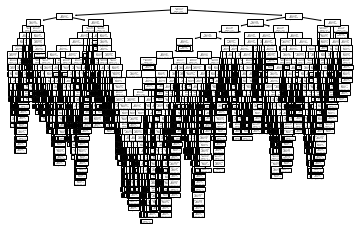

In [31]:
plot_tree(pet_classifier, filled=True)
plt.show()

In [ ]:
plot_tree(breed_classifier)

[Text(52.91036310484077, 213.93290322580646, 'X[0] <= 0.5\ngini = 0.569\nsamples = 18834\nvalue = [9000, 8357, 1477]'),
 Text(10.280803663944958, 206.91870967741934, 'X[13] <= 70.0\ngini = 0.147\nsamples = 6826\nvalue = [0, 6281, 545]'),
 Text(5.647763915944792, 199.90451612903226, 'X[13] <= -28.0\ngini = 0.01\nsamples = 197\nvalue = [0, 1, 196]'),
 Text(5.425738798856053, 192.89032258064515, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(5.869789033033531, 192.89032258064515, 'gini = 0.0\nsamples = 196\nvalue = [0, 0, 196]'),
 Text(14.913843411945123, 199.90451612903226, 'X[4] <= 14.0\ngini = 0.1\nsamples = 6629\nvalue = [0, 6280, 349]'),
 Text(6.313839267211009, 192.89032258064515, 'X[5] <= 1.5\ngini = 0.028\nsamples = 6130\nvalue = [0, 6043, 87]'),
 Text(3.3373150412401045, 185.87612903225806, 'X[6] <= 53.5\ngini = 0.004\nsamples = 4036\nvalue = [0, 4028, 8]'),
 Text(2.2896340199776186, 178.86193548387098, 'X[4] <= 9.5\ngini = 0.003\nsamples = 4011\nvalue = [0, 4004, 7]'),
 Te